In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('NBA.csv')

In [3]:
len(df)

11145

In [4]:
df.head()


,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_') 
string_columns = list(df.dtypes[df.dtypes == 'object'].index) 
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_') 

In [6]:
df.head()

,unnamed:_0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,dennis_rodman,chi,36.0,198.12,99.790240,southeastern_oklahoma_state,usa,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,dwayne_schintzius,lac,28.0,215.90,117.933920,florida,usa,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,earl_cureton,tor,39.0,205.74,95.254320,detroit_mercy,usa,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,ed_o'bannon,dal,24.0,203.20,100.697424,ucla,usa,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,ed_pinckney,mia,34.0,205.74,108.862080,villanova,usa,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


/home/petruso/ntbks/ENTER/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pts'>

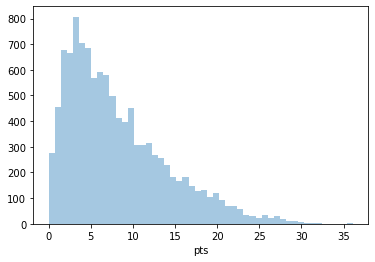

In [7]:
sns.distplot(df.pts, kde=False)

In [8]:
log_pts = np.log1p(df.pts)

<AxesSubplot:xlabel='pts'>

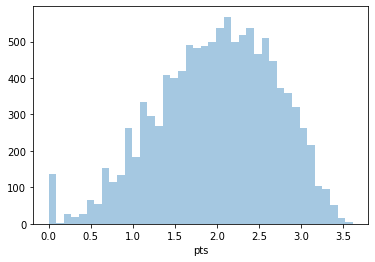

In [9]:
sns.distplot(log_pts, kde=False)

In [10]:
df.isnull().sum()

unnamed:_0           0
player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
dtype: int64

In [11]:
n = len(df) 
n_val = int(0.2 * n) 
n_test = int(0.2 * n) 
n_train = n - (n_val + n_test) 
np.random.seed(2) 
idx = np.arange(n) 
np.random.shuffle(idx) 
df_shuffled = df.iloc[idx] 
df_train = df_shuffled.iloc[:n_train].copy() #F
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy() #F
df_test = df_shuffled.iloc[n_train+n_val:].copy() #F

In [12]:
y_train = np.log1p(df_train.pts.values)
y_val = np.log1p(df_val.pts.values)
y_test = np.log1p(df_test.pts.values)

In [13]:
del df_train['pts']
del df_val['pts']
del df_test['pts']

In [14]:
def linear_regression(X, y):
# adding the dummy column
    ones = np.ones(X.shape[0]) 
    X = np.column_stack([ones, X]) 
    # normal equation formula
    XTX = X.T.dot(X) 
    XTX_inv = np.linalg.inv(XTX) 
    w = XTX_inv.dot(X.T).dot(y) 
    return w[0], w[1:] 

In [15]:
base = ['age', 'player_height', 'gp','player_weight','reb']
df_num = df_train[base]

In [16]:
X_train = df_num.values

In [17]:
w_0, w = linear_regression(X_train, y_train)

In [18]:
y_pred = w_0 + X_train.dot(w)

/home/petruso/ntbks/ENTER/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


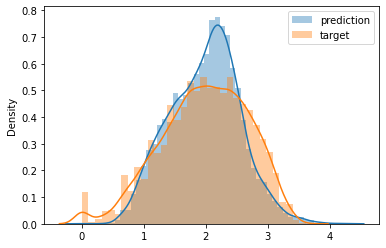

In [19]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='target')
plt.legend()

In [20]:
def rmse(y, y_pred):
    error = y_pred - y 
    mse = (error ** 2).mean() 
    return np.sqrt(mse) 

In [21]:
rmse(y_train, y_pred)

0.41001937306069547

In [22]:
df_num = df_val[base]

In [23]:
df_num = df_num.fillna(0)
X_val = df_num.values
y_pred = w_0 + X_val.dot(w)

In [24]:
rmse(y_val, y_pred)

0.4104058946839716

In [25]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [26]:
X_train = prepare_X(df_train) 
w_0, w = linear_regression(X_train, y_train) 
X_val = prepare_X(df_val) 
y_pred = w_0 + X_val.dot(w) 
print('validation:', rmse(y_val, y_pred)) 

validation: 0.4104058946839716


In [27]:
df_num = df_val[base]
df_num = df_num.fillna(0)
X_val = df_num.values

In [28]:
_pred = w_0 + X_val.dot(w)

In [29]:
rmse(y_val, y_pred)

0.4104058946839716

/home/petruso/ntbks/ENTER/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/petruso/ntbks/ENTER/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


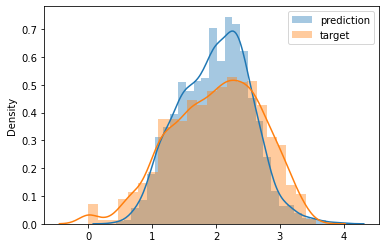

In [30]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_val, label='target')
plt.legend()

In [39]:
inp = {
'age':23, 'player_height':208.28, 'gp':75,'player_weight':113.398,'reb':10.7
}
#17-18 stats of 20-21 MVP Nikola Jokic

In [40]:
df_test = pd.DataFrame([inp])
X_test = prepare_X(df_test)

In [41]:
y_pred = w_0 + X_test.dot(w)

In [43]:
suggestion = np.expm1(y_pred)
suggestion[0]

24.229938620811208